# Run CleanVision on a dataset in cloud

CleanVision checks can be run on a dataset residing in a cloud storage as well. It currently supports S3, Google Cloud Storage and Azure Blob Storage. Before using CleanVision on a cloud dataset, access to the appropriate storage needs to be configured on your machine:

- S3 (`"s3://"`): `aws configure` (same as `boto` configuration).
- Google Storage (`"gs://"`): `gcloud auth login`.
- Azure Blob Storage (`"az://"`): you need to pass your secrets in the `storage_opts`. This is also an option for S3 and Google Storage but is generally not recommended.

See the cloud providers' websites for details on configuring access to storage from your machine. Internally CleanVision uses the `fsspec` Python interface to work with cloud datasets. Check the [fsspec documentation](https://filesystem-spec.readthedocs.io/en/latest/) to learn more.

If your machine is in the cloud, the secret keys for dataset access may already exist in your environment. In this case, you may not need to configure anything. 

### Install optional dependencies

In [ ]:
!pip install -U pip
!pip install "cleanvision[s3] @ git+https://github.com/cleanlab/cleanvision.git" # for aws
# !pip install "cleanvision[azure] @ git+https://github.com/cleanlab/cleanvision.git" for azure blob storage
# !pip install "cleanvision[gcs] @ git+https://github.com/cleanlab/cleanvision.git" for google cloud storage

**After you install these packages, you may need to restart your notebook runtime before running the rest of this notebook.**

In [1]:
from cleanvision.imagelab import Imagelab

### Set dataset path and optional arguments

For running CleanVision, we use [Amazon Berkeley Objects (ABO)](https://amazon-berkeley-objects.s3.amazonaws.com/index.html#) dataset that is publicly available on [S3](https://amazon-berkeley-objects.s3.amazonaws.com/index.html#aws). Here we are accessing the dataset using an anonymous connection, however for a private dataset you can supply the credentials using config or environment variables and set `anon=False`.

In [2]:
cloud_path = "s3://amazon-berkeley-objects/images/small/aa/"
storage_opts = {"anon": True}

### Run CleanVision

In [3]:
imagelab = Imagelab(data_path=cloud_path, storage_opts=storage_opts)
imagelab.find_issues()

Reading images from amazon-berkeley-objects/images/small/aa
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/1604 [00:00<?, ?it/s]

  0%|          | 0/1604 [00:00<?, ?it/s]

Issue checks completed. 124 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


Sometimes for specific operating system or python version, `imagelab.find_issues()` might get stuck in a deadlock caused by incompatibilities between s3fs and multiprocessing packages. In such cases, set n_jobs=1 in `imagelab.find_issues(n_jobs=1)` to avoid the deadlock.

Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | odd_aspect_ratio |           58 |
|  1 | low_information  |           23 |
|  2 | grayscale        |           21 |
|  3 | near_duplicates  |           10 |
|  4 | light            |            8 |
|  5 | dark             |            4 |
|  6 | blurry           |            0 |
|  7 | odd_size         |            0 |
|  8 | exact_duplicates |            0 | 

----------------- odd_aspect_ratio images ------------------

Number of examples with this issue: 58
Examples representing most severe instances of this issue:



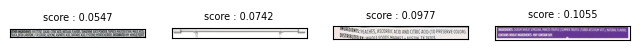

------------------ low_information images ------------------

Number of examples with this issue: 23
Examples representing most severe instances of this issue:



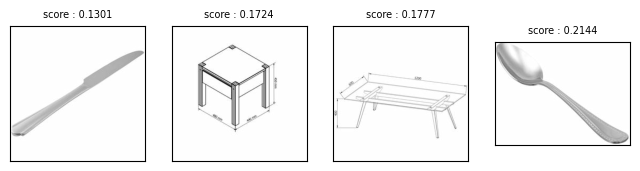

--------------------- grayscale images ---------------------

Number of examples with this issue: 21
Examples representing most severe instances of this issue:



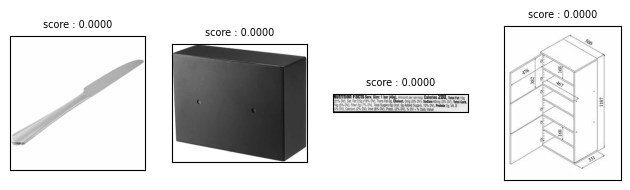

------------------ near_duplicates images ------------------

Number of examples with this issue: 10
Examples representing most severe instances of this issue:

Set: 0


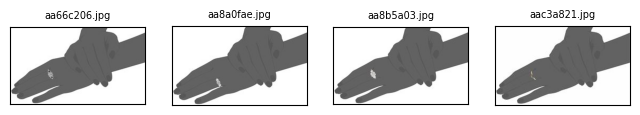

Set: 1


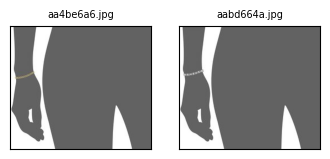

Set: 2


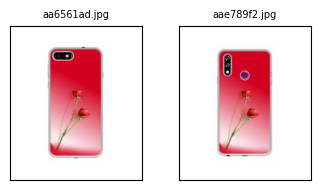

Set: 3


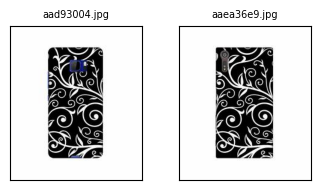

----------------------- light images -----------------------

Number of examples with this issue: 8
Examples representing most severe instances of this issue:



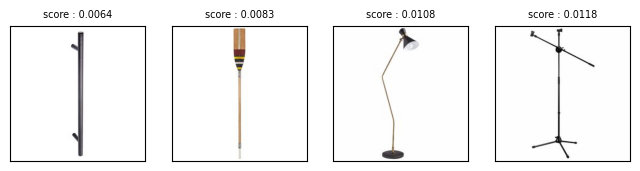

----------------------- dark images ------------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:



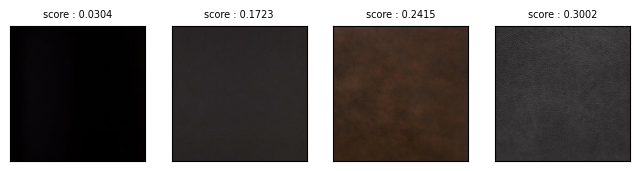

In [4]:
imagelab.report()

### Explicitly authenticating with credentials
Authentication can also be done by passing appropriate environments to the optional argument `storage_opts`. 

We install a dotenv environment for better handling of the secrets.

Create a `.env` file in the root directory with the following contents:

```
AZURE_STORAGE_ACCOUNT_NAME=XXXXX # your account name
AZURE_STORAGE_ACCOUNT_KEY=XXXX # storage account key to your storage account
```

It's also possible to pass the S3 credentials in the same way:
```
AWS_ACCESS_KEY_ID=XXXX
AWS_SECRET_ACCESS_KEY=XXX
```

Install python-dotenv

```shell
pip install python-dotenv
```

The following code snippet shows how to supply credentials explicitly for azure storage.

```python
import os
from dotenv import load_dotenv

load_dotenv()
# the container is called `main` and it contains a folder called `test-dataset`
cloud_path = "az://main/test-dataset/"
ACCOUNT_KEY = os.environ.get("AZURE_STORAGE_ACCOUNT_KEY")
ACCOUNT_NAME = os.environ.get("AZURE_STORAGE_ACCOUNT_NAME")
storage_opts = {"account_name": ACCOUNT_NAME, "account_key": ACCOUNT_KEY}
imagelab = Imagelab(data_path=cloud_path, storage_opts=storage_opts)
imagelab.find_issues()
imagelab.report()
```